In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('iris.csv').drop('Id', axis=1)
data['Species'] = data['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score


def plot_decision_boundary(X, y, model, title, feat_name=None, svm=True):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')
    if svm:
        plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='r', label='Support Vectors')
    if feat_name is None:
        plt.xlabel('Feature 1 (normalized)')
        plt.ylabel('Feature 2 (normalized)')
    else:
        plt.xlabel(f"{feat_name[0]} (normalized)")
        plt.ylabel(f"{feat_name[1]} (normalized)")
    plt.legend()
    plt.title(title)
    plt.show()

def runner(X, y, kernel="rbf", feat_name=None):
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    svm_binary = SVC(kernel=kernel)
    svm_binary.fit(X_train, y_train)

    y_pred = svm_binary.predict(X_test)
    print("Classification Report for Binary-class SVM:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

    plot_decision_boundary(X_train, y_train, svm_binary, title=f"Decision Boundary of SVM ({kernel} Kernel)", feat_name=feat_name)


# Linear Kernel for 2-class and 3-class Cases

Classification Report for Binary-class SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


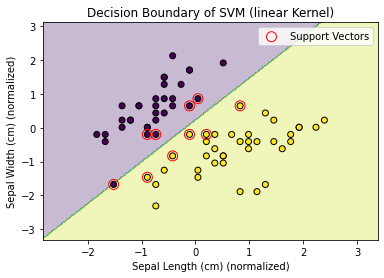

In [6]:
# Binary classification: Select two classes (0 and 1) and two features
binary_data = data[data['Species'].isin([0, 1])]
X_binary = binary_data[['SepalLengthCm', 'SepalWidthCm']].values
y_binary = binary_data['Species'].values

runner(X_binary, y_binary, kernel="linear", feat_name=["Sepal Length (cm)", "Sepal Width (cm)"])

Classification Report for Binary-class SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45

Accuracy: 0.8


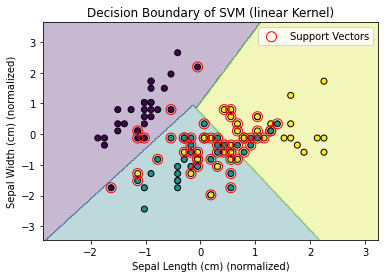

In [7]:
multi_data = data[data['Species'].isin([0, 1, 2])]
X_multi = multi_data[['SepalLengthCm', 'SepalWidthCm']].values
y_multi = multi_data['Species'].values

runner(X_multi, y_multi, kernel="linear", feat_name=["Sepal Length (cm)", "Sepal Width (cm)"])

# RBF Kernel (Gaussian) for 2-class and 3-class Cases

Classification Report for Binary-class SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


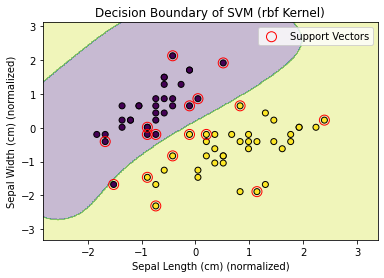

In [8]:
# Binary classification: Select two classes (0 and 1) and two features
binary_data = data[data['Species'].isin([0, 1])]
X_binary = binary_data[['SepalLengthCm', 'SepalWidthCm']].values
y_binary = binary_data['Species'].values

runner(X_binary, y_binary, kernel="rbf", feat_name=["Sepal Length (cm)", "Sepal Width (cm)"])

Classification Report for Binary-class SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.54      0.54      0.54        13
           2       0.54      0.54      0.54        13

    accuracy                           0.73        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.73      0.73      0.73        45

Accuracy: 0.7333333333333333


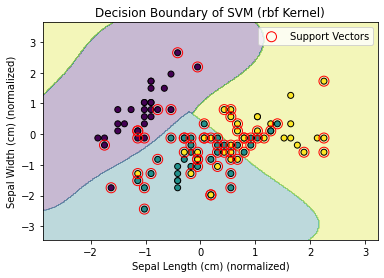

In [9]:
multi_data = data[data['Species'].isin([0, 1, 2])]
X_multi = multi_data[['SepalLengthCm', 'SepalWidthCm']].values
y_multi = multi_data['Species'].values

runner(X_multi, y_multi, kernel="rbf", feat_name=["Sepal Length (cm)", "Sepal Width (cm)"])

# Equivalence between kNN and SVM

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


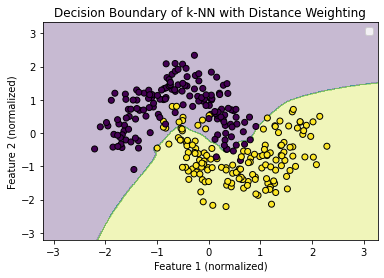

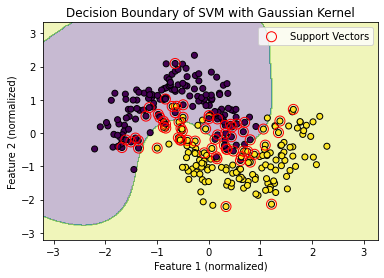

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train k-NN with distance weighting
knn = KNeighborsClassifier(n_neighbors=len(X_train), weights='distance')
knn.fit(X_train, y_train)

# Train SVM with Gaussian kernel
svm = SVC(kernel='rbf', gamma='scale')
svm.fit(X_train, y_train)

plot_decision_boundary(X, y, knn, 'Decision Boundary of k-NN with Distance Weighting', svm=False)
plot_decision_boundary(X, y, svm, 'Decision Boundary of SVM with Gaussian Kernel')